In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [6]:
def muon(txt, nor = True):
    datos = np.loadtxt(txt)
    datos= datos[datos[:, 0] < 40000]
    filter_data = datos[:, 0]
    
    
    valores_unicos, frecuencias = np.unique(filter_data, return_counts=True)


    x = valores_unicos = np.insert(valores_unicos, 0, 20)*1e-3
    frecuencias = np.insert(frecuencias, 0, 0)

    frecuencias_acumuladas = np.cumsum(frecuencias).astype(float)

    max_ = frecuencias_acumuladas[-1]

    y = max_-frecuencias_acumuladas
   
    #y = np.log(y/max_)
    
    
    if nor:
        fig, axs = plt.subplots(3, 1, figsize=(8, 7), sharex=True, gridspec_kw={'height_ratios': [3, 1,1]})
        axs[0].errorbar(valores_unicos,y, xerr = 1e-3, yerr = 1, fmt=' ', capsize=1, elinewidth=0.5,markeredgewidth=1, capthick=0.5, label = "Datos")
        p0 = [max_, 2.2,0]
        param, conv = ajuste(x,y,p0)
        y_modelo = modelo(x,*param)
        axs[0].plot(x,modelo(x,*param), color = "Black",label = "Ajuste", linestyle = "--")
        axs[0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        axs[0].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador
        axs[0].set_ylabel("Muones Restantes \n")
        axs[0].legend()
        axs[1].scatter(x, y_modelo-y, s = 3)
        axs[1].axhline(0, color='black', linestyle='--', linewidth=0.5)
        axs[1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        axs[1].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador
        axs[1].set_ylabel("Residuales")
        axs[2].scatter(x, (y_modelo-y)/norm(x,y,1), s= 3)
        axs[2].axhline(0, color='black', linestyle='--', linewidth=0.5)
        axs[2].set_xlabel(r"Tiempo $[\mu s]$")
        axs[2].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        axs[2].set_ylabel("Residuales \n Normalizados")
        axs[2].yaxis.get_offset_text().set_visible(True)  # Ocultar el multiplicador
        
        a_err, b_err, c_err = np.sqrt(np.diag(conv))
        print("N_0:", param[0], "+/-", a_err)
        print("tau:", param[1], "+/-", b_err)
        print("B:", param[2], "+/-", c_err)
        print("Max:", max_)
    else: 
        fig, axs = plt.subplots(3, 1, figsize=(8, 7), sharex=True, gridspec_kw={'height_ratios': [3, 1,1]})
        y[-1] = 0.1
        y = np.log((y)/max_)
        max_ = y[0]
        p0 = [2.2]
        param, conv = ajuste_2(x,y,p0 )
        y_modelo =modelo_2(x,*param)
        axs[0].plot(x, modelo_2(x,*param), label = "Ajuste")
        axs[0].errorbar(x,y, xerr = 0.001, yerr = 0.1, fmt=' ', capsize=1, elinewidth=0.5,markeredgewidth=1, capthick=0.5, label = "Datos")
        axs[0].legend("small")
        axs[0].set_ylabel(r"$\ln(\frac{N}{N_0})$")
        axs[1].scatter(x, y_modelo-y, s = 3)
        axs[1].axhline(0, color='black', linestyle='--', linewidth=0.5)
        axs[1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        axs[1].set_ylabel("Residuales")
        axs[2].scatter(x, (y_modelo-y)/norm(x,y,0.1), s= 3)
        axs[2].axhline(0, color='black', linestyle='--', linewidth=0.5)
        axs[2].set_xlabel(r"Tiempo $[\mu s]$")
        axs[2].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        axs[2].set_ylabel("Residuales \n Normalizados")
        axs[2].yaxis.get_offset_text().set_visible(True) 
        print("Tau: ", param[0], "+/-", np.sqrt(np.diag(conv)))
        print("Max: ", max_)
        
    
    
def ajuste(x,y,p_0):
    params, params_covariance = curve_fit(modelo, x, y, p0 = p_0)
    return params, params_covariance
def ajuste_2(x,y,p_0):
    params, params_covariance = curve_fit(modelo_2, x, y, p0 = p_0)
    return params, params_covariance

    
def modelo(t, a, tau,b):
        return a*np.e**(-t/tau)+b
    
    
    
def modelo_2(t, tau):
        return -t/tau
    
def norm(x,y,e):
    i = e*np.ones(len(x))
    w = 1/(i**2)
    sum_w =np.sum(w)
    sum_w_x_2 = np.sum((x**2)*w)
    sum_w_x = np.sum(w*x)
    delta_prima = (sum_w*sum_w_x_2)-(sum_w_x)**2 
    return np.sqrt(sum_w/delta_prima)

    
    
    
    
    

N_0: 7606.807427240851 +/- 23.1400150776253
tau: 2.664239555929254 +/- 0.014756741477205156
B: 311.7888835725683 +/- 7.027127122823973
Max: 8255.0


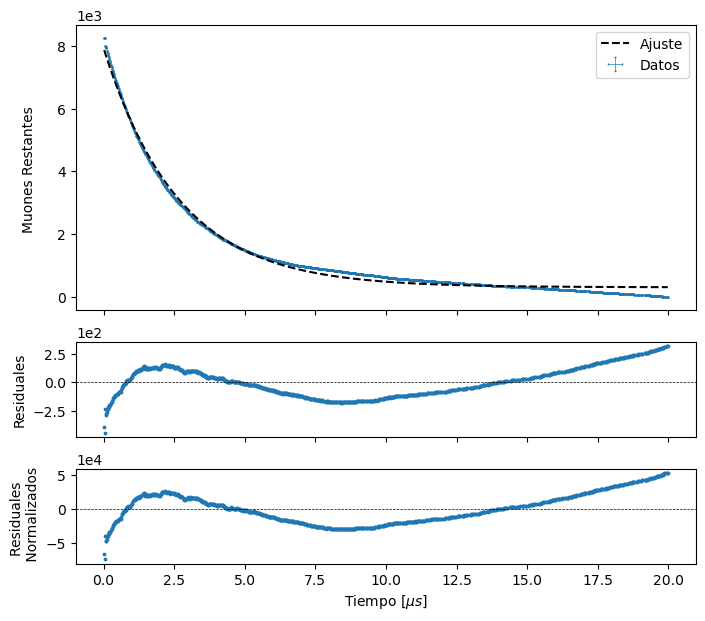

In [7]:
muon("muon__1.txt", True)

Tau:  3.99018743055988 +/- [0.02354985]
Max:  0.0


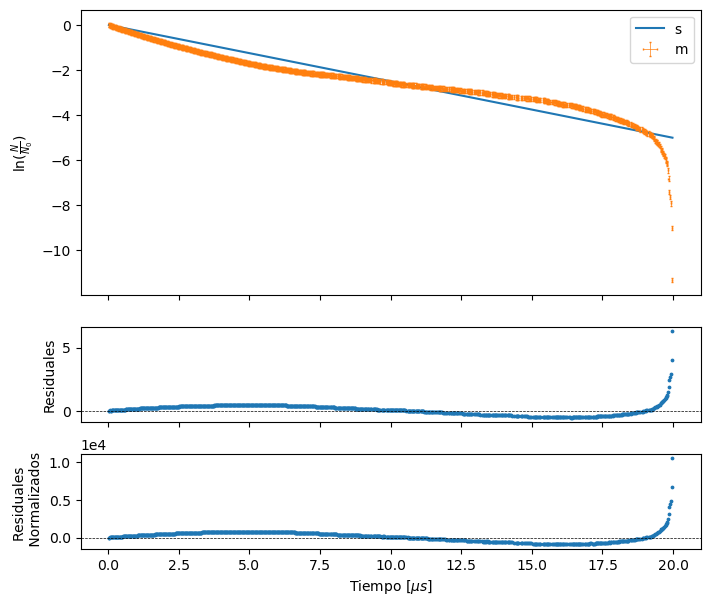

In [8]:
muon("muon__1.txt", False)

Datos Robados

N_0: 6641.992317865747 +/- 11.131595394024602
tau: 2.1022703550656527 +/- 0.00671113015929582
B: 97.6488728666959 +/- 3.866136998651719
Max: 7470.0


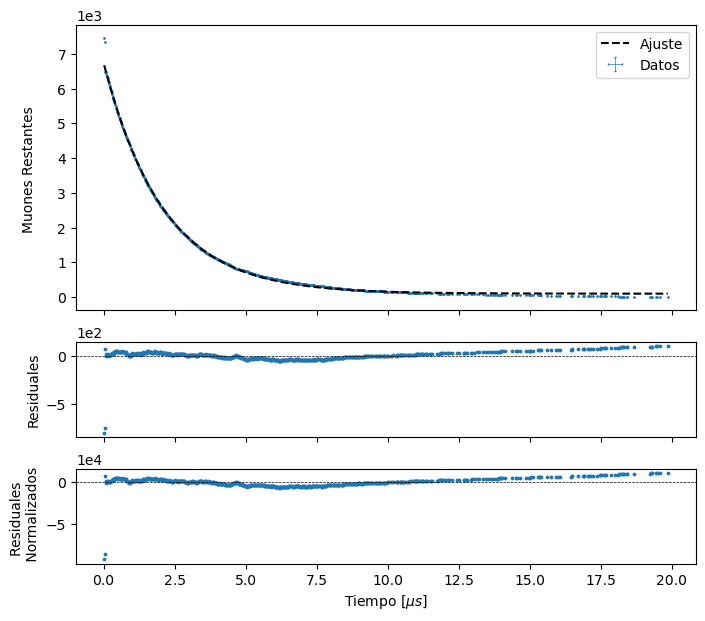

In [9]:
muon("_.txt")

Tau:  2.6405672387168573 +/- [0.01430386]
Max:  0.0


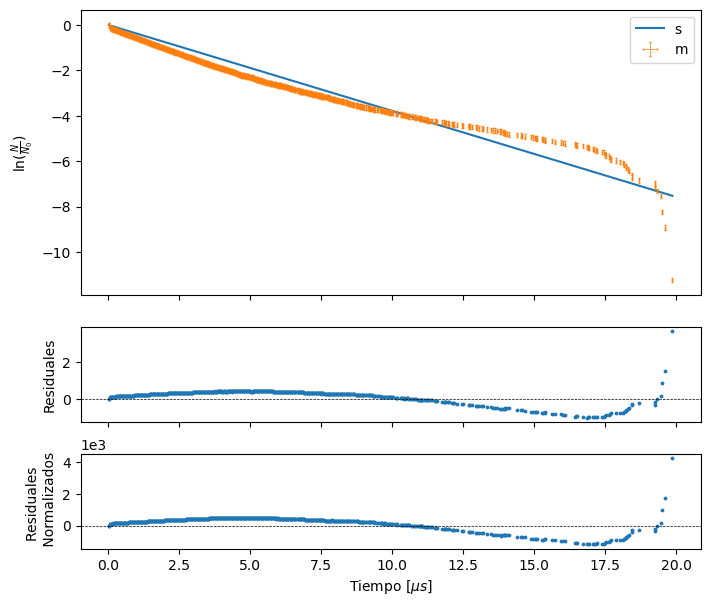

In [10]:
muon("_.txt", False)